In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [47]:
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

In [48]:
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

In [49]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
def train_model(activation_fn):
    model = Sequential([
        Dense(16, activation=activation_fn, input_shape=(4,)),
        Dense(3, activation='softmax')
    ])
    
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(X_train, y_train,
                        epochs=10,
                        batch_size=8,
                        validation_data=(X_test, y_test),
                        verbose=0)
    return history

In [52]:
activations = ['relu', 'sigmoid', 'tanh']
histories = {}

for activation in activations:
    print(f"Training with {activation} activation...")
    histories[activation] = train_model(activation)

Training with relu activation...


c:\Users\ASLAM\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training with sigmoid activation...
Training with tanh activation...


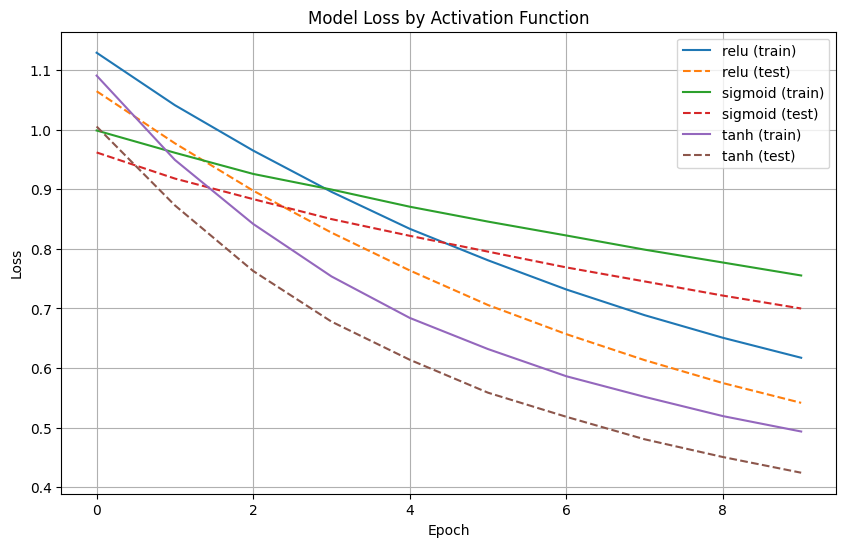

In [53]:
plt.figure(figsize=(10, 6))
for activation in activations:
    plt.plot(histories[activation].history['loss'], 
             label=f'{activation} (train)')
    plt.plot(histories[activation].history['val_loss'], 
             '--', label=f'{activation} (test)')

plt.title('Model Loss by Activation Function')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

In [54]:
print("\nFinal Test Accuracies:")
for activation in activations:
    val_acc = histories[activation].history['val_accuracy'][-1]
    print(f"{activation}: {val_acc:.4f}")


Final Test Accuracies:
relu: 0.8667
sigmoid: 0.9333
tanh: 0.9000
